# Motivating example: Brownian motion data

- The cantilever spring constant $k_\text{c}$ is determined by fitting the power spectral density of position fluctuations $P_{\delta x}$ near the cantilever's resonance frequency.

- Normal curve fitting routines assume normally distributed errors,  however, the power spectral density is always positive, and the distribution is not closely approximated by a normal distribution.

- Think through the notation more clearly later.


$$
\begin{align}
\mu &\sim P(f, f_\text{c}, k_\text{c}, Q) + P_\text{det}& \\

\end{align}
$$

Individual power spectra $y$ are drawn from a log normal distribution.

$$
\begin{align}
\exp(\mu_i + \sigma_i^2/2)& = P(x_i, f_\text{c}, k_\text{c}, Q) + P_\text{det} & \\
\mu_i & = \log (P(x_i, f_\text{c}, k_\text{c}, Q) + P_\text{det}) - \sigma_i^2/2 & \\
\end{align}
$$



$$
\begin{align}
\sigma_i& \sim \alpha + \beta \mu_i& \\
y_i & \sim \log \mathcal{N}(\mu_i, \sigma_i)&
\end{align}
$$

## Naive model

- Collect power spectral density of position fluctuation data, mean $y$, and standard deviation $y_\sigma$, for $N$ samples.

$$
\begin{align}
\mu_i &\sim P(x_i, f_\text{c}, k_\text{c}, Q) + P_\text{det}& \\
\sigma_i & \sim \frac{y_\sigma}{\sqrt{N}} \\
y &\sim \mathcal{N}(\mu, \sigma)&
\end{align}
$$

Previously, this is the model I had used; it was optimized using ``scipy.optimize.curve_fit``.

## Show non-normally distributed errors

Assume we have data described by,

$$
\begin{align}
\mu_i &\sim P(x_i, f_\text{c}, k_\text{c}, Q) + P_\text{det}& \\
\bar{y}_i& \sim \log \mathcal{N}(\mu_i, \sigma_i)& 
\end{align}
$$


In [124]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pymc3 import Model, Normal, HalfNormal, find_MAP, NUTS, sample

ImportError: No module named pymc3

In [23]:
def std_lognormal(x, sigma):
    return np.where(
            x > 0,
            np.exp(-np.log(x)**2 / (2*sigma**2)) / (x * sigma * np.sqrt(2*np.pi)),
            0)

In [44]:
x = np.arange(0., 100, 0.01)
p = std_lognormal(x, 1)

/Users/ryandwyer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/Users/ryandwyer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


In [67]:
p.size

10000

In [90]:
p_FT = np.fft.rfft(p/100, n=p.size)

In [101]:
p4_FT = np.fft.irfft(p_FT**8,)

In [ ]:
p32_FT = np.fft.irfft(p_FT**32)

In [102]:
p4_FT

array([  1.73500497e-08,   1.73389542e-08,   1.73278669e-08, ...,
         1.73833853e-08,   1.73722653e-08,   1.73611534e-08])

In [103]:
x4 = np.arange(p4_FT.size)*0.01

(0, 10)

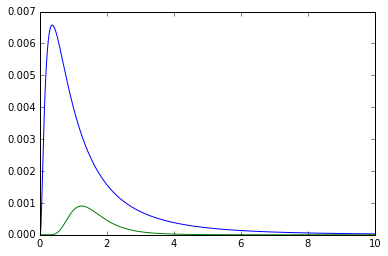

In [104]:
plt.plot(x, p/100)
plt.plot(x4/8, p4_FT)
plt.xlim(0, 10)

In [116]:
np.sum((x)**2 * p/100)**0.5

2.7120333332398112

In [118]:
np.sum((np.arange(p2.size)*0.01/2)**2 * p2/100**2)**0.5

2.2441639312620749

In [112]:
np.sum((x4/8)**2 * p4_FT)**0.5

1.815042341333351

In [122]:
8**(-0.2)

0.6597539553864471

(0, 20)

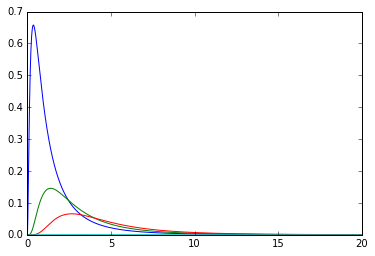

In [63]:
plt.plot(x, p)
p2 = np.convolve(p, p, mode='full')
p3 = np.convolve(p2, p, mode='full')
p4 = np.convolve(p3, p, mode='full')
plt.plot(np.arange(p2.size)*0.01, p2/100)
plt.plot(np.arange(p3.size)*0.01, p3/100**2 / 3)
plt.plot(np.arange(p4.size)*0.01, p4/100**4 / 4)
plt.xlim(0, 20)

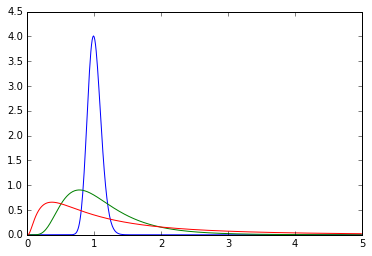

In [17]:
plt.plot(x, std_lognormal(x, 0.1))
plt.plot(x, std_lognormal(x, 0.5))
plt.plot(x, std_lognormal(x, 1))

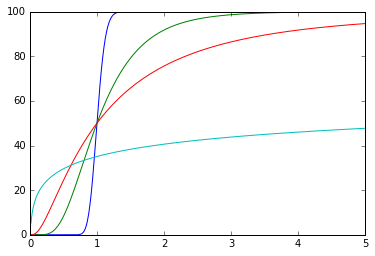

In [20]:
plt.plot(x, np.cumsum(std_lognormal(x, 0.1)))
plt.plot(x, np.cumsum(std_lognormal(x, 0.5)))
plt.plot(x, np.cumsum(std_lognormal(x, 1)))
plt.plot(x, np.cumsum(std_lognormal(x, 5)))